In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define your image size and directory paths
#image_size = (1980, 1080)
normal_images_dir = "./normal images"
anomaly_images_dir = "./Anomalies_projectml"

# Define hyperparameters
batch_size = 64
epochs = 50

In [4]:
import math, re, os, cv2
import random
import gc
from tqdm import tqdm
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("Tensorflow version " + tf.__version__)

from skimage.util import random_noise
from skimage.transform import rotate, AffineTransform, warp

Tensorflow version 2.13.0


In [5]:
normal_images=[]
import os
img_list = os.listdir(normal_images_dir)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(normal_images_dir+'/'+str(i), target_size=(768,768,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    normal_images.append(img)

normal_images= np.array(normal_images[1:])
normal_images.shape

100%|██████████| 102/102 [00:02<00:00, 35.74it/s]


(101, 768, 768, 3)

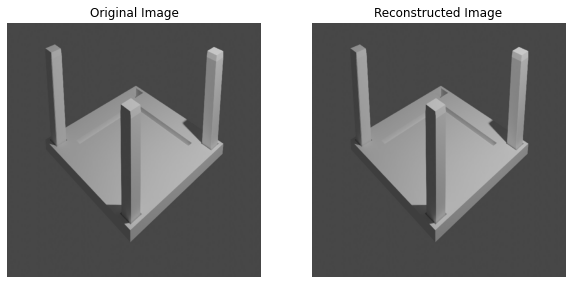

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(normal_images[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(normal_images[1])
plt.axis('off')
plt.show()

In [7]:
anomaly_images=[]
import os
img_list = os.listdir(anomaly_images_dir)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(anomaly_images_dir+'/'+str(i), target_size=(768,768,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    anomaly_images.append(img)

anomaly_images= np.array(anomaly_images[1:])
anomaly_images.shape

100%|██████████| 39/39 [00:01<00:00, 22.66it/s]


(38, 768, 768, 3)

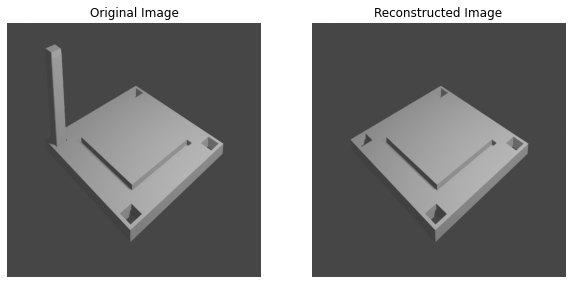

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(anomaly_images[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(anomaly_images[1])
plt.axis('off')
plt.show()

In [9]:
# image_size=(768,768)
# # Build the autoencoder model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense , Flatten , Reshape
# from keras.models import Model

# # Input layer
# input_img = Input(shape=(768,768, 3))

# # Encoder
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)


# x = Flatten()(encoded)
# x = Dense(4608, activation='relu')(x)
# encoded = Dense(1152, activation='relu')(x)

# # Decoder
# x = Dense(1152, activation='relu')(encoded)
# x = Dense(4608, activation='relu')(x)
# x = Reshape((24, 24, 8))(x)  # Reshape for the Conv2D layers

# # Decoder
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# #decoded=Reshape((768,768,3))(decoded)

# # Create the autoencoder model
# autoencoder = Model(input_img, decoded)

# # Compile the model
# autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# # Print model summary
# autoencoder.summary()


In [10]:
# # # Split normal data into train and validation datasets
X_train, X_val = train_test_split(normal_images, test_size=0.2, random_state=seed)

# # Define hyperparameters
# batch_size = 32
# epochs = 25

# # Define the number of steps per epoch
# steps_per_epoch = 5

# # Fit the autoencoder model on the training data with a custom steps_per_epoch
# history = autoencoder.fit(
#     X_train,
#     X_train,  # Target is the same as input for autoencoders
#     epochs=epochs,
#     #batch_size=batch_size,
#     steps_per_epoch=steps_per_epoch  # Set the number of steps per epoch
# )

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()
# # Save the model to Google Drive
# autoencoder.save("./my_model_2.h5")


In [11]:
from keras.models import load_model

# Specify the file path of the saved model on Google Drive
model_path = "./my_model_2.h5"  # Update with the correct file path

# Load the model
autoencoder = load_model(model_path)


In [12]:

# # Select the 1st image from X_val
# sample_image = X_val[0:1]

# # Use the autoencoder model to obtain the reconstructed image
# reconstructed_image = autoencoder.predict(sample_image)

# # Plot the original and reconstructed image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(sample_image[0])
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title("Reconstructed Image")
# plt.imshow(reconstructed_image[0])
# plt.axis('off')
# plt.show()




In [13]:
# import numpy as np

# # Predict the autoencoder model on anomaly_images
# reconstructions_normal = autoencoder.predict(normal_images)

# # Calculate the Mean Absolute Error (MAE) for each anomaly image
# normal_loss = np.mean(np.abs(reconstructions_normal- normal_images), axis=(1, 2, 3))

# # Plot the histogram of the MAE for anomaly images
# plt.hist(normal_loss, bins=50)
# plt.xlabel("Normal loss (MAE)")
# plt.ylabel("Number of examples")
# plt.show()


In [14]:
# #sss Select the 1st image from X_val
# sample_image_2 = anomaly_images[0:1]

# # Use the autoencoder model to obtain the reconstructed image
# reconstructed_image = autoencoder.predict(sample_image_2)

# # Plot the original and reconstructed image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(sample_image_2[0])
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title("Reconstructed Image")
# plt.imshow(reconstructed_image[0])
# plt.axis('off')
# plt.show()




In [15]:
# # Predict the autoencoder model on anomaly_images
# reconstructions_anomaly = autoencoder.predict(anomaly_images)

# # Calculate the Mean Absolute Error (MAE) for each anomaly image
# anomaly_loss = np.mean(np.abs(reconstructions_anomaly - anomaly_images), axis=(1, 2, 3))

# # Plot the histogram of the MAE for anomaly images
# plt.hist(anomaly_loss, bins=50)
# plt.xlabel("Anomaly loss (MAE)")
# plt.ylabel("Number of examples")
# plt.show()

In [16]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define your image size and directory paths
#image_size = (1980, 1080)
normal_images_dir = "./correct_images"
test_images_cor = "./test_images"
test_images_anomaly = "./test_images_anomaly"

# Define hyperparameters
batch_size = 64
epochs = 50

In [17]:
correct_images=[]
import os
img_list = os.listdir(normal_images_dir)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(normal_images_dir+'/'+str(i), target_size=(768,768,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    correct_images.append(img)

correct_images= np.array(correct_images[1:])
correct_images.shape

100%|██████████| 323/323 [00:12<00:00, 25.70it/s]


(322, 768, 768, 3)

In [21]:
test_images=[]
import os
img_list = os.listdir(test_images_cor)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(test_images_cor+'/'+str(i), target_size=(768,768,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    test_images.append(img)

test_images= np.array(test_images[5:])
test_images.shape

100%|██████████| 85/85 [00:02<00:00, 28.44it/s]


(80, 768, 768, 3)

3/3 [==============================] - 38s 10s/step


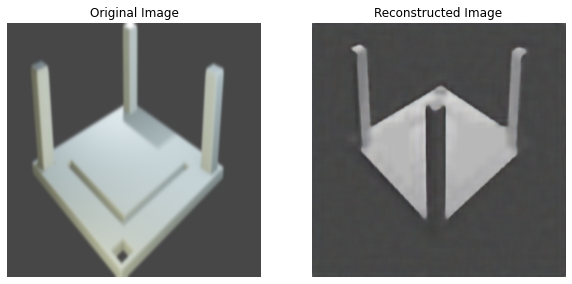

In [25]:

# Select the 1st image from X_val
sample_image = test_images[0:75]

# Use the autoencoder model to obtain the reconstructed image
reconstructed_image = autoencoder.predict(sample_image)

# Plot the original and reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[74])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image[74])
plt.axis('off')
plt.show()




In [29]:
test_anomaly=[]
import os
img_list = os.listdir(test_images_anomaly)
for i in tqdm(img_list):
    img = tf.keras.preprocessing.image.load_img(test_images_anomaly+'/'+str(i), target_size=(768,768,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255.
    test_anomaly.append(img)

test_anomaly= np.array(test_anomaly[1:])
test_anomaly.shape

TypeError: listdir: path should be string, bytes, os.PathLike or None, not list

In [ ]:
#sss Select the 1st image from X_val
sample_image_2 = test_images_anomaly[0:1]

# Use the autoencoder model to obtain the reconstructed image
reconstructed_image = autoencoder.predict(sample_image_2)

# Plot the original and reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image_2[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image[0])
plt.axis('off')
plt.show()




In [ ]:
# Predict the autoencoder model on anomaly_images
reconstructions_correct = autoencoder.predict(correct_images)

# Calculate the Mean Absolute Error (MAE) for each anomaly image
correct_loss = np.mean(np.abs(reconstructions_correct - correct_images), axis=(1, 2, 3))

# Plot the histogram of the MAE for anomaly images
plt.hist(correct_loss, bins=50)
plt.xlabel("correct loss (MAE)")
plt.ylabel("Number of examples")
plt.show()

11/11 [==============================] - 212s 16s/step
